In [1]:
import fastbook
fastbook.setup_book()

In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [3]:
key = os.environ.get('AZURE_SEARCH-KEY', 'd8b67e7c416f406096b02bec8a85be8f')

In [4]:
bear_types = 'panda','polar bear'
path = Path('bear')

In [5]:
if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o}')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [25]:
fns = get_image_files(path)
fns

(#238) [Path('bear/polar bear/00000055.jpg'),Path('bear/polar bear/00000036.jpg'),Path('bear/polar bear/00000030.jpg'),Path('bear/polar bear/00000097.jpg'),Path('bear/polar bear/00000148.jpg'),Path('bear/polar bear/00000029.jpg'),Path('bear/polar bear/00000091.jpg'),Path('bear/polar bear/00000147.jpg'),Path('bear/polar bear/00000103.jpg'),Path('bear/polar bear/00000035.jpg')...]

In [26]:
failed = verify_images(fns)
failed

(#0) []

In [27]:
failed.map(Path.unlink);

In [28]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label, 
    item_tfms=Resize(128))

In [29]:
dls = bears.dataloaders(path)

In [30]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

TypeError: __init__() takes 2 positional arguments but 3 were given

In [35]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

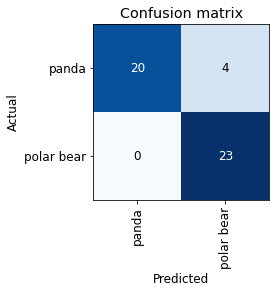

In [36]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

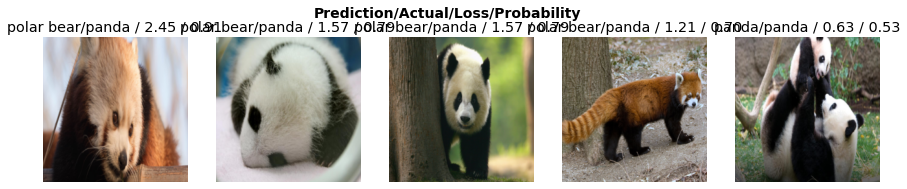

In [37]:

interp.plot_top_losses(5, nrows=1)

In [38]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [39]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [40]:
learn.export()

In [41]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [42]:
learn_inf = load_learner(path/'export.pkl')

In [43]:

learn_inf.dls.vocab

['panda', 'polar bear']

In [45]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [46]:
img = PILImage.create(btn_upload.data[-1])

In [47]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [48]:
pred,pred_idx,probs = learn_inf.predict(img)

In [49]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: polar bear; Probability: 1.0000')

In [50]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [51]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [52]:
btn_upload = widgets.FileUpload()

In [53]:
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [54]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

     |████████████████████████████████| 2.5 MB 8.3 MB/s eta 0:00:01
     |████████████████████████████████| 374 kB 51.4 MB/s eta 0:00:01
     |████████████████████████████████| 552 kB 39.1 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 7.3 MB/s  eta 0:00:01
  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalled nbconvert-5.6.1
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

nbdev 1.1.5 requires nbconvert<6, but you'll have nbconvert 6.0.7 which is incompatible.
Enabling: voila
- Writing config: /opt/conda/envs/fastai/etc/jupyter
    - Validating...
      voila 0.2.7 OK
